In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName("MYAPP").getOrCreate()

25/04/16 03:53:23 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [4]:
import time
import matplotlib.pyplot as plt

+---------+--------------+
|StudentID|avg(StudentID)|
+---------+--------------+
|      105|         105.0|
|      101|         101.0|
+---------+--------------+

+---------+--------------+
|StudentID|avg(StudentID)|
+---------+--------------+
|      102|         102.0|
|      105|         105.0|
+---------+--------------+

+---------+--------------+
|StudentID|avg(StudentID)|
+---------+--------------+
|      103|         103.0|
|      105|         105.0|
+---------+--------------+

+---------+--------------+
|StudentID|avg(StudentID)|
+---------+--------------+
|      104|         104.0|
|      105|         105.0|
+---------+--------------+

+---------+--------------+
|StudentID|avg(StudentID)|
+---------+--------------+
|      105|         105.0|
+---------+--------------+



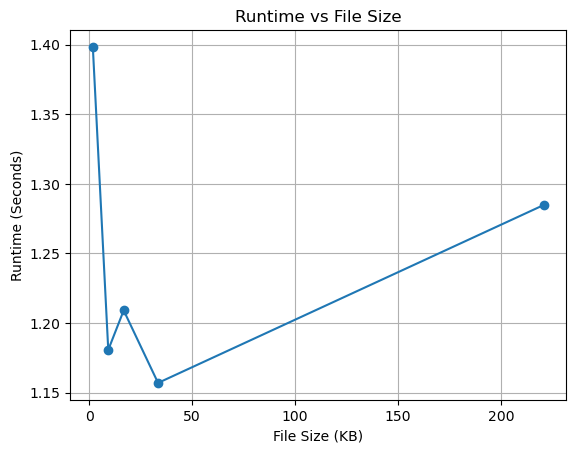

In [6]:
files = [
    ("gs://dataproc-staging-us-central1-176366540446-vnmuytv8/data/data1.csv", 1.7),
    ("gs://dataproc-staging-us-central1-176366540446-vnmuytv8/data/data2.csv", 9.2),
    ("gs://dataproc-staging-us-central1-176366540446-vnmuytv8/data/data3.csv", 16.7),
    ("gs://dataproc-staging-us-central1-176366540446-vnmuytv8/data/data4.csv", 33.4),
    ("gs://dataproc-staging-us-central1-176366540446-vnmuytv8/data/data5.csv", 220.8),
]

runtimes = []
sizes = []

for path, size in files:
    start = time.time()
    df = spark.read.csv(path, header=True, inferSchema=True)
    df.groupBy('StudentID').avg('StudentID').show()
    end = time.time()

    runtimes.append(end - start)
    sizes.append(size)

plt.plot(sizes, runtimes, marker='o')
plt.xlabel("File Size (KB)")
plt.ylabel("Runtime (Seconds)")
plt.title("Runtime vs File Size")
plt.grid(True)